In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
os.getcwd()

'/usr1/student/premv/Documents/Cloudy-explore-ISM-assignment'

In [2]:
home = str(Path.home())
cloudy = home+'/c17.01/source/cloudy.exe'
import pyCloudy as pc
# Changing the location and version of the cloudy executable.
pc.config.cloudy_exe = cloudy

warng pyCloudy config: pyCloudy works better with PyNeb


In [3]:
if os.getcwd()[-13:]!='/cloudy_files':
    os.chdir(os.getcwd()+'/cloudy_files/')
os.getcwd()

'/usr1/student/premv/Documents/Cloudy-explore-ISM-assignment/cloudy_files'

In [4]:
from subprocess import run, PIPE
p = run(['ls','-al'],stdout=PIPE)
print(str(p.stdout,'utf-8'))

total 1848
drwxr-xr-x 7 premv academic   4096 Apr 27  2020 .
drwxr-xr-x 7 premv academic   4096 Apr 27  2020 ..
-rw-r--r-- 1 premv academic  11855 Apr 27 13:01 demo1.ele_H
-rw-r--r-- 1 premv academic  11859 Apr 27 13:01 demo1.ele_He
-rw-r--r-- 1 premv academic   3898 Apr 27 13:01 demo1.lin
-rw-r--r-- 1 premv academic 209185 Apr 27 13:01 demo1.out
-rw-r--r-- 1 premv academic  80332 Apr 27 13:01 demo1.ovr
-rw-r--r-- 1 premv academic  11855 Apr 27 13:01 demo1_T=4.0000e+04_hden=3.00_ISM.ele_H
-rw-r--r-- 1 premv academic  11859 Apr 27 13:01 demo1_T=4.0000e+04_hden=3.00_ISM.ele_He
-rw-r--r-- 1 premv academic   3898 Apr 27 13:01 demo1_T=4.0000e+04_hden=3.00_ISM.lin
-rw-r--r-- 1 premv academic  11615 Apr 27 13:01 demo1_T=4.0000e+04_hden=3.00_ISM_metals=0.50.ele_H
-rw-r--r-- 1 premv academic  11619 Apr 27 13:01 demo1_T=4.0000e+04_hden=3.00_ISM_metals=0.50.ele_He
-rw-r--r-- 1 premv academic     40 Apr 27 13:01 demo1_T=4.0000e+04_hden=3.00_ISM_metals=0.50_hii_temp.avr
-rw-r--r-- 1 premv academic 

In [5]:
def gen_input(model_name,T_star,log_R_star,log_n,abund,metals,dir_=os.getcwd()):
    full_model_name = model_name+"_T={0:d}_hden={1:.2f}_{2}_metals={3:.2f}".format(T_star,log_n,abund,metals)
    cloudin = """set save prefix "{0}"
black body, T = {1:d} K radius = {2:.6f}
CMB
hden = {3:.2f}
init file="ism.ini"
abundances {4}
metals {5:.2f}
radius = 18.477121
sphere
set temperature floor 1000
stop temperature 100K
stop efrac -3
database h-like element hydrogen levels resolved 10
iterate
normalize to "Ca B" 4861.36A
print lines emergent off
print column densities
print line optical depths
plot continuum range .1
save overview last ".ovr"
save averages, file="_hii_temp.avr" last no clobber
temperature, hydrogen 2 over volume
end of averages
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save linelist ".lin" "LineList_HII.dat" last no hash column
table lines "LineList_HII.dat"
""".format(full_model_name,T_star,log_R_star,log_n,abund,metals)
    with open(dir_+'/'+full_model_name+".in",'wt') as input_file:
        input_file.write(cloudin)
    return full_model_name

In [6]:
T_star = 40000
log_R_star = 12.113943
log_n = 3
abund = 'ISM'
metals = 0.5
model_name='demo1'
gen_input(model_name,T_star,log_R_star,log_n,abund,metals)
dir_ = os.getcwd()

pc.print_make_file(dir_=dir_)
pc.run_cloudy(dir_ = dir_, n_proc = 16, model_name = 'demo1', use_make = True)

In [7]:
dir_vary_hden = os.getcwd()+"/vary_hden/"
Path(dir_vary_hden).mkdir(parents=True, exist_ok=True)

T_star = 40000
log_R_star = 12.113943
log_n = 2
abund = 'ISM'
metals = 0.5
log_n_vary = np.linspace(0,3.75,16)
model_name='toy'
models_vary_hden = []
for log_n in log_n_vary:
    models_vary_hden.append(gen_input(model_name,T_star,log_R_star,log_n,abund,metals,dir_=dir_vary_hden))

pc.print_make_file(dir_=dir_vary_hden)
pc.run_cloudy(dir_ = dir_vary_hden, n_proc = 16, model_name = 'toy', use_make = True)

In [8]:
dir_vary_metals = os.getcwd()+"/vary_metals/"
Path(dir_vary_metals).mkdir(parents=True, exist_ok=True)

T_star = 40000
log_R_star = 12.113943
log_n = 2
abund = 'ISM'
metals = 0.5
metals_vary = np.array([0.25,0.5,0.75,1,1.5,2,2.5,3])
model_name='toy'
models_vary_metals = []
for metals in metals_vary:
    models_vary_metals.append(gen_input(model_name,T_star,log_R_star,log_n,abund,metals,dir_=dir_vary_metals))
    
pc.print_make_file(dir_=dir_vary_metals)
pc.run_cloudy(dir_ = dir_vary_metals, n_proc = 8, model_name = 'toy', use_make = True)

In [9]:
dir_vary_T_star = os.getcwd()+"/vary_T_star/"
Path(dir_vary_T_star).mkdir(parents=True, exist_ok=True)

T_star = 40000
log_R_star = 12.113943
log_n = 2
abund = 'ISM'
metals = 0.5
T_star_vary = np.array([16400, 18800, 20800, 25400, 30000, 39000, 40850, 44000])
log_R_star_vary = np.array([11.422206, 11.523663, 11.569149, 11.649957, 11.711654, 11.867728, 11.89164, 11.956365])
model_name='toy'
models_vary_T_star = []
for T_star,log_R_star in zip(T_star_vary,log_R_star_vary):
    models_vary_T_star.append(gen_input(model_name,T_star,log_R_star,log_n,abund,metals,dir_=dir_vary_T_star))
    
pc.print_make_file(dir_=dir_vary_T_star)
pc.run_cloudy(dir_ = dir_vary_T_star, n_proc = 8, model_name = 'toy', use_make = True)

In [10]:
pc.log_.print_messages()
pc.log_.print_errors()

_Config         at 2020-04-27 18:18:21.531325 : cloudy_exe set to cloudy.exe
PyCloudy init   at 2020-04-27 18:18:21.986414 : Starting pyCloudy.
_Config         at 2020-04-27 18:18:21.986434 : db_connector set to PyMySQL
PyCloudy init   at 2020-04-27 18:18:22.181940 : pyCloudy ready.
_Config         at 2020-04-27 18:18:22.182092 : cloudy_exe set to /usr1/student/premv/c17.01/source/cloudy.exe
run_cloudy      at 2020-04-27 18:18:22.257972 : running: cd /usr1/student/premv/Documents/Cloudy-explore-ISM-assignment/cloudy_files ; make -j 16 name="demo1"
run_cloudy      at 2020-04-27 18:21:45.637867 : ending: cd /usr1/student/premv/Documents/Cloudy-explore-ISM-assignment/cloudy_files ; make -j 16 name="demo1"
run_cloudy      at 2020-04-27 18:21:45.671752 : running: cd /usr1/student/premv/Documents/Cloudy-explore-ISM-assignment/cloudy_files/vary_hden/ ; make -j 16 name="toy"
run_cloudy      at 2020-04-27 18:26:10.265091 : ending: cd /usr1/student/premv/Documents/Cloudy-explore-ISM-assignment/c

In [11]:
dir_ = os.getcwd()+"/vary_hden/"

In [12]:
ovrdf = pd.read_csv(dir_+models_vary_hden[1]+'.ovr',delimiter="\t")
lindf = pd.read_csv(dir_+models_vary_hden[1]+'.lin',delimiter="\t",skiprows=1)  #,comment='#'

In [69]:
for line,value in lindf['iteration 2'].items():
    if line[0]=='O' and value > .01:
        print(line,value)

O  2 3726.03A  0.75679
O  2 3728.81A  1.1347
O  3 4958.91A  0.36107
O  3 5006.84A  1.0773
O  3 51.8004m  0.37894
O  3 88.3323m  0.6895399999999999


In [68]:
OIII = 'O  3 5006.84A '
OII = 'O  2 3728.81A '
Ha = 'H  1 6562.81A '
Hb = 'H  1 4861.33A '
Lya = 'H  1 1215.67A '
NII = 'N  2 6583.45A '
lindf['iteration 2'][NII]

0.79174

In [121]:
ele_he = pd.read_csv(dir_+models_vary_hden[2]+'.ele_He',delimiter='\t')
ele_h = pd.read_csv(dir_+models_vary_hden[2]+'.ele_H',delimiter='\t')

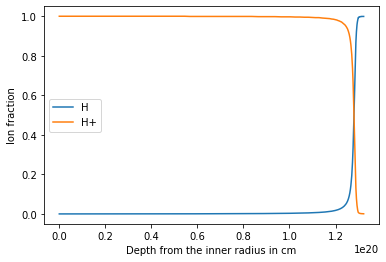

In [131]:
plt.plot(ele_h['#depth'],ele_h['H'],label="H")
plt.plot(ele_h['#depth'],ele_h['H+'],label="H+")
plt.xlabel('Depth from the inner radius in cm')
plt.ylabel('Ion fraction')
# plt.xscale('log')
# plt.xlim(2e17,4e17)
plt.legend()
plt.savefig('ion_fraction_H.pdf',bbox_inches='tight')

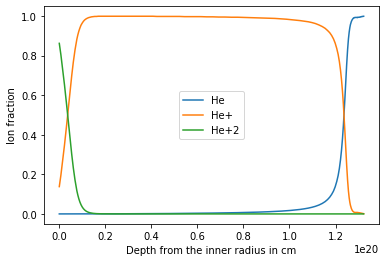

In [132]:
plt.plot(ele_he['#depth'],ele_he['He'],label="He")
plt.plot(ele_he['#depth'],ele_he['He+'],label="He+")
plt.plot(ele_he['#depth'],ele_he['He+2'],label="He+2")
plt.xlabel('Depth from the inner radius in cm')
plt.ylabel('Ion fraction')
# plt.xscale('log')
# plt.xlim(2e17,4e17)
plt.legend()
plt.savefig('ion_fraction_He.pdf',bbox_inches='tight')

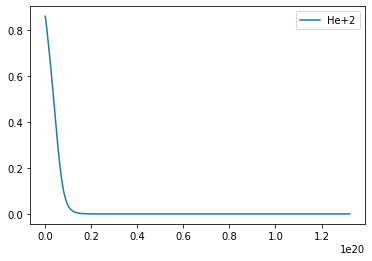

In [127]:
# plt.plot(ele_he['#depth'],ele_he['He'],label="He")
plt.plot(ele_he['#depth'],ele_he['He+2'],label="He+2")
# plt.xscale('log')
# plt.xlim(2e17,4e17)
plt.legend()

In [126]:
ele_he

,#depth,He,He+,He+2
0,2.161780e+15,7.300000e-07,0.13800,8.620000e-01
1,1.297070e+16,7.410000e-07,0.13900,8.610000e-01
2,5.620620e+16,7.840000e-07,0.14300,8.570000e-01
3,1.526110e+17,8.840000e-07,0.15000,8.500000e-01
4,2.787150e+17,1.030000e-06,0.16100,8.390000e-01
...,...,...,...,...
330,1.319590e+20,9.980000e-01,0.00165,2.140000e-14
331,1.320240e+20,9.980000e-01,0.00155,2.030000e-14
332,1.320890e+20,9.990000e-01,0.00146,1.930000e-14
333,1.321550e+20,9.990000e-01,0.00137,1.830000e-14


In [18]:
def find_depth_HII(model,dir_):
    ele_h = pd.read_csv(dir_+model+'.ele_H',delimiter='\t')
    return ele_h['#depth'][ele_h['H'].searchsorted(.99,side='left')]
def find_depth_HeII(model,dir_):
    ele_he = pd.read_csv(dir_+model+'.ele_He',delimiter='\t')
    return ele_he['#depth'][ele_he['He'].searchsorted(.99,side='left')]


In [97]:
import analytical1 as anal

OIII = 'O  3 5006.84A '
OII = 'O  2 3728.81A '
Ha = 'H  1 6562.81A '
Hb = 'H  1 4861.33A '
Lya = 'H  1 1215.67A '
NII = 'N  2 6583.45A '


T_star = 40000
log_R_star = 12.113943
log_n = 2
abund = 'ISM'
metals = 0.5

depth_cld_vary_hden = []
depth_anal_vary_hden = []
T_avg_vary_hden = []

OIIIOII_vary_hden = []
NIIHa_vary_hden = []
LyaHa_vary_hden = []
HaHb_vary_hden = []

for model,log_n in zip(models_vary_hden,log_n_vary):
    depth_cld_vary_hden.append(find_depth_HII(model,dir_vary_hden))
    T_avg = float(np.genfromtxt(dir_vary_hden+model+'_hii_temp.avr'))
    depth_anal_vary_hden.append(anal.depth_nodim(T_star,log_R_star,log_n,T_avg))
    T_avg_vary_hden.append(T_avg)
    lindf = pd.read_csv(dir_vary_hden+model+'.lin',delimiter="\t",skiprows=1)['iteration 2']
    OIIIOII_vary_hden.append(lindf[OIII]/lindf[OII])
    NIIHa_vary_hden.append(lindf[NII]/lindf[Ha])
    LyaHa_vary_hden.append(lindf[Lya]/lindf[Ha])
    HaHb_vary_hden.append(lindf[Ha]/lindf[Hb])
    

T_star = 40000
log_R_star = 12.113943
log_n = 2
abund = 'ISM'
metals = 0.5
    
depth_cld_vary_metals = []
depth_anal_vary_metals = []
T_avg_vary_metals = []

OIIIOII_vary_metals = []
NIIHa_vary_metals = []
LyaHa_vary_metals = []
HaHb_vary_metals = []

for model in models_vary_metals:
    depth_cld_vary_metals.append(find_depth_HII(model,dir_vary_metals))
    T_avg = float(np.genfromtxt(dir_vary_metals+model+'_hii_temp.avr'))
    depth_anal_vary_metals.append(anal.depth_nodim(T_star,log_R_star,log_n,T_avg))
    T_avg_vary_metals.append(T_avg)
    lindf = pd.read_csv(dir_vary_metals+model+'.lin',delimiter="\t",skiprows=1)['iteration 2']
    OIIIOII_vary_metals.append(lindf[OIII]/lindf[OII])
    NIIHa_vary_metals.append(lindf[NII]/lindf[Ha])
    LyaHa_vary_metals.append(lindf[Lya]/lindf[Ha])
    HaHb_vary_metals.append(lindf[Ha]/lindf[Hb])


T_star = 40000
log_R_star = 12.113943
log_n = 2
abund = 'ISM'
metals = 0.5

depth_cld_vary_T_star = []
depth_He_cld_vary_T_star = []
depth_anal_vary_T_star = []
T_avg_vary_T_star = []

OIIIOII_vary_T_star = []
NIIHa_vary_T_star = []
LyaHa_vary_T_star = []
HaHb_vary_T_star = []

for model,T_star,log_R_star in zip(models_vary_T_star,T_star_vary,log_R_star_vary):
    depth_cld_vary_T_star.append(find_depth_HII(model,dir_vary_T_star))
    depth_He_cld_vary_T_star.append(find_depth_HeII(model,dir_vary_T_star))
    T_avg = float(np.genfromtxt(dir_vary_T_star+model+'_hii_temp.avr'))
    depth_anal_vary_T_star.append(anal.depth_nodim(T_star,log_R_star,log_n,T_avg))
    T_avg_vary_T_star.append(T_avg)
    lindf = pd.read_csv(dir_vary_T_star+model+'.lin',delimiter="\t",skiprows=1)['iteration 2']
    OIIIOII_vary_T_star.append(lindf[OIII]/lindf[OII])
    NIIHa_vary_T_star.append(lindf[NII]/lindf[Ha])
    LyaHa_vary_T_star.append(lindf[Lya]/lindf[Ha])
    HaHb_vary_T_star.append(lindf[Ha]/lindf[Hb])

/usr1/student/premv/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


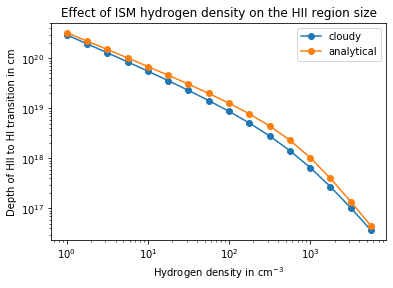

In [98]:
plt.plot(10**log_n_vary,depth_cld_vary_hden,label='cloudy',marker='o')
plt.plot(10**log_n_vary,depth_anal_vary_hden,label='analytical',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hydrogen density in cm$^{-3}$')
plt.ylabel('Depth of HII to HI transition in cm')
plt.legend()
plt.title('Effect of ISM hydrogen density on the HII region size')
plt.savefig('HII_size_vary_hden.pdf',bbox_inches='tight')

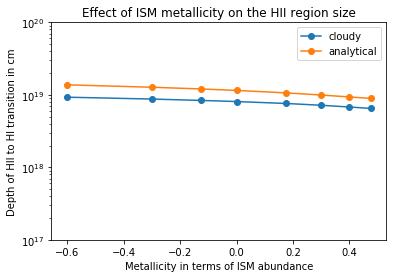

In [99]:
plt.plot(np.log10(metals_vary),depth_cld_vary_metals,label='cloudy',marker='o')
plt.plot(np.log10(metals_vary),depth_anal_vary_metals,label='analytical',marker='o')
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Metallicity in terms of ISM abundance')
plt.ylabel('Depth of HII to HI transition in cm')
plt.ylim(1e17,1e20)
plt.legend()
plt.title('Effect of ISM metallicity on the HII region size')
plt.savefig('HII_size_vary_metals.pdf',bbox_inches='tight')

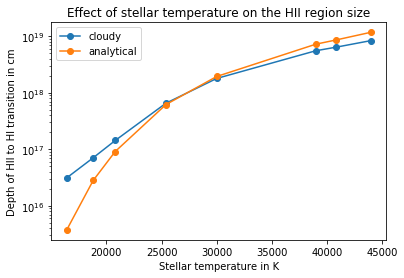

In [100]:
plt.plot(T_star_vary,depth_cld_vary_T_star,label='cloudy',marker='o')
plt.plot(T_star_vary,depth_anal_vary_T_star,label='analytical',marker='o')
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stellar temperature in K')
plt.ylabel('Depth of HII to HI transition in cm')
plt.legend()
plt.title('Effect of stellar temperature on the HII region size')
plt.savefig('HII_size_vary_T_star.pdf',bbox_inches='tight')

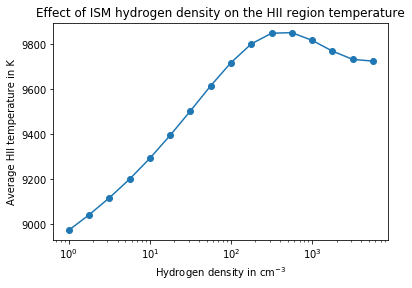

In [101]:
plt.plot(10**log_n_vary,T_avg_vary_hden,marker='o')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Hydrogen density in cm$^{-3}$')
plt.ylabel('Average HII temperature in K')
# plt.legend()
plt.title('Effect of ISM hydrogen density on the HII region temperature')
plt.savefig('HII_temp_vary_hden.pdf',bbox_inches='tight')

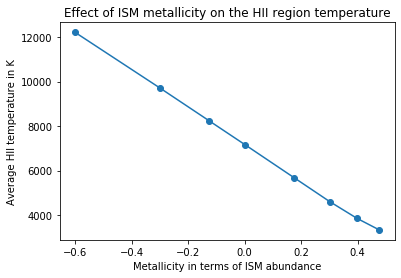

In [102]:
plt.plot(np.log10(metals_vary),T_avg_vary_metals,marker='o')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Metallicity in terms of ISM abundance')
plt.ylabel('Average HII temperature in K')
# plt.ylim(1e17,1e20)
# plt.legend()
plt.title('Effect of ISM metallicity on the HII region temperature')
plt.savefig('HII_temp_vary_metals.pdf',bbox_inches='tight')

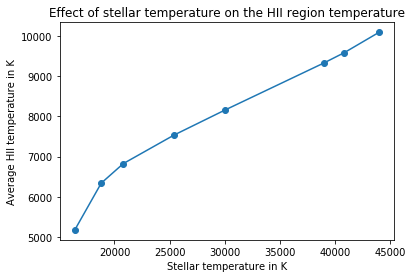

In [103]:
plt.plot(T_star_vary,T_avg_vary_T_star,marker='o')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Stellar temperature in K')
plt.ylabel('Average HII temperature in K')
# plt.legend()
plt.title('Effect of stellar temperature on the HII region temperature')
plt.savefig('HII_temp_vary_T_star.pdf',bbox_inches='tight')

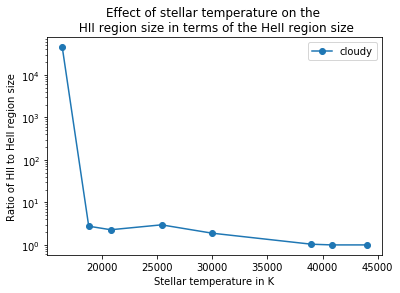

In [119]:
size_ratio = np.array(depth_cld_vary_T_star)/np.array(depth_He_cld_vary_T_star)
plt.plot(T_star_vary,size_ratio,label='cloudy',marker='o')
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stellar temperature in K')
plt.ylabel('Ratio of HII to HeII region size')
plt.legend()
plt.title('Effect of stellar temperature on the \n HII region size in terms of the HeII region size')
plt.savefig('ratio_size_vary_T_star.pdf',bbox_inches='tight')

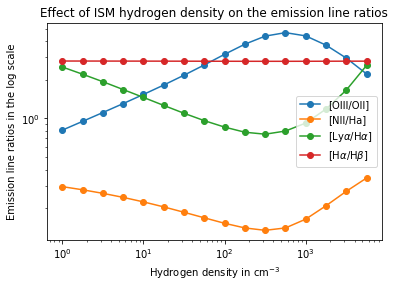

In [105]:
plt.plot(10**log_n_vary,OIIIOII_vary_hden,label=r'[OIII/OII]',marker='o')
plt.plot(10**log_n_vary,NIIHa_vary_hden,label=r'[NII/Ha]',marker='o')
plt.plot(10**log_n_vary,LyaHa_vary_hden,label=r'[Ly$\alpha$/H$\alpha$]',marker='o')
plt.plot(10**log_n_vary,HaHb_vary_hden,label=r'[H$\alpha$/H$\beta$]',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hydrogen density in cm$^{-3}$')
plt.ylabel('Emission line ratios in the log scale')
plt.legend()
plt.title('Effect of ISM hydrogen density on the emission line ratios')
plt.savefig('line_ratios_vary_hden.pdf',bbox_inches='tight')

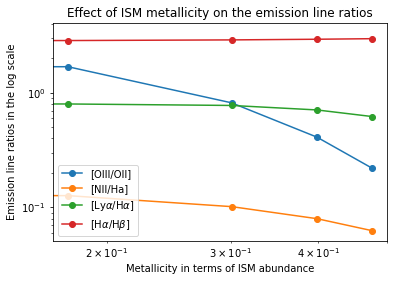

In [106]:
plt.plot(np.log10(metals_vary),OIIIOII_vary_metals,label=r'[OIII/OII]',marker='o')
plt.plot(np.log10(metals_vary),NIIHa_vary_metals,label=r'[NII/Ha]',marker='o')
plt.plot(np.log10(metals_vary),LyaHa_vary_metals,label=r'[Ly$\alpha$/H$\alpha$]',marker='o')
plt.plot(np.log10(metals_vary),HaHb_vary_metals,label=r'[H$\alpha$/H$\beta$]',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Metallicity in terms of ISM abundance')
plt.ylabel('Emission line ratios in the log scale')
plt.legend()
plt.title('Effect of ISM metallicity on the emission line ratios')
plt.savefig('line_ratios_vary_metals.pdf',bbox_inches='tight')


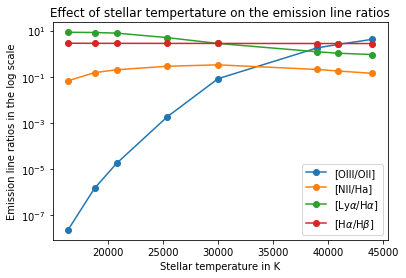

In [107]:
plt.plot(T_star_vary,OIIIOII_vary_T_star,label=r'[OIII/OII]',marker='o')
plt.plot(T_star_vary,NIIHa_vary_T_star,label=r'[NII/Ha]',marker='o')
plt.plot(T_star_vary,LyaHa_vary_T_star,label=r'[Ly$\alpha$/H$\alpha$]',marker='o')
plt.plot(T_star_vary,HaHb_vary_T_star,label=r'[H$\alpha$/H$\beta$]',marker='o')
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stellar temperature in K')
plt.ylabel('Emission line ratios in the log scale')
plt.legend()
plt.title('Effect of stellar tempertature on the emission line ratios')
plt.savefig('line_ratios_vary_T_star.pdf',bbox_inches='tight')

In [108]:
# import multiprocessing

# def work(cmd):
#     return run(cmd, shell=False)

# if __name__ == '__main__':
#     count = multiprocessing.cpu_count()
#     pool = multiprocessing.Pool(processes=count)
#     print (pool.map(work, ['ls'] * count))

In [109]:
# from subprocess import run, PIPE
# cl_demo = run([cloudy,'-p','demo1'],stdout=PIPE)

In [110]:
# print(str(cl_demo.stdout,'utf-8'))
# cl_demo

In [114]:
for val in log_R_star_vary:
    print(val)

11.422206
11.523663
11.569149
11.649957
11.711654
11.867728
11.89164
11.956365
